# **Simple Linear Regression**

# Importing Libraries

In [95]:
import numpy as np                                                              # Import NumPy library for numerical operations.
import pandas as pd                                                             # Import Pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt                                                 # Import Matplotlib library for data visualization.
import seaborn as sns                                                           # Import seaborn library for data visualization
from sklearn.linear_model import LinearRegression                               # Import LinearRegression model from Scikit-Learn.
from sklearn.model_selection import train_test_split                            # Import train_test_split for splitting data into training and testing sets.
from sklearn.metrics import r2_score, mean_absolute_error                       # Import r2_score, mean absolute error from Scikit-Learn metrics.

# Loading the Dataset

In [5]:
df_salary=pd.read_csv(r"salaries.csv")                                          # Read the CSV file into a DataFrame.

# Dataset information

In [7]:
df_salary.head()                                                                # Display the first few rows of the DataFrame.

,experience,income
0,1,30450
1,3,35670
2,2,31580
3,5,40130
4,10,47830


In [8]:
df_salary.describe()                                                            # Provides summary statistics for numerical columns.

,experience,income
count,107.000000,107.000000
mean,7.168224,41158.037383
std,4.005859,8145.620590
min,1.000000,27840.000000
25%,4.000000,35635.000000
50%,6.000000,40700.000000
75%,10.000000,45900.000000
max,19.000000,65000.000000


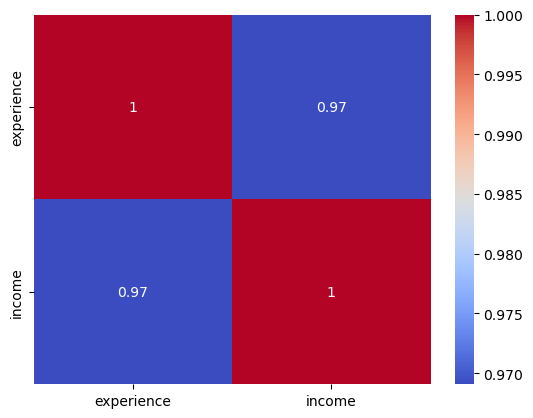

In [9]:
sns.heatmap(df_salary.corr(), annot=True, cmap="coolwarm")                      # Create a heatmap to visualize the correlation matrix
plt.show()                                                                      # Display the heatmap

# Data Preprocessing

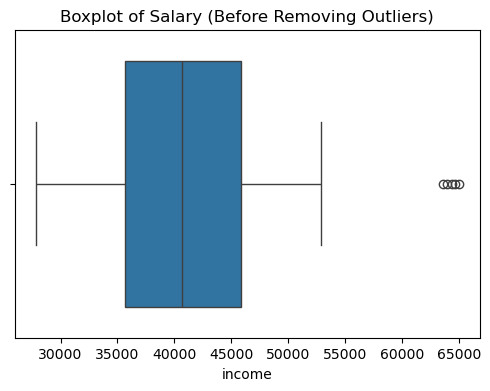

In [11]:
plt.figure(figsize=(6,4))                                 # Create a figure with a specified size (6 inches by 4 inches)
sns.boxplot(x=df_salary['income'])                        # Generate a boxplot for the 'income' column in df_salary
plt.title("Boxplot of Salary (Before Removing Outliers)") # Set the title of the plot
plt.show()                                                # Display the boxplot before removing outliers

# Outlier Detection and Removal using the Interquartile Range (IQR) Method

In [13]:
Q1 = df_salary[['experience', 'income']].quantile(0.25)                         # 25th percentile
Q3 = df_salary[['experience', 'income']].quantile(0.75)                         # 75th percentile
IQR = Q3 - Q1                                                                   # Interquartile range

df_salary = df_salary[~((df_salary < (Q1 - 1.5 * IQR)) | (df_salary > (Q3 + 1.5 * IQR))).any(axis=1)] # Keeping only values within the IQR range (1.5*IQR rule)

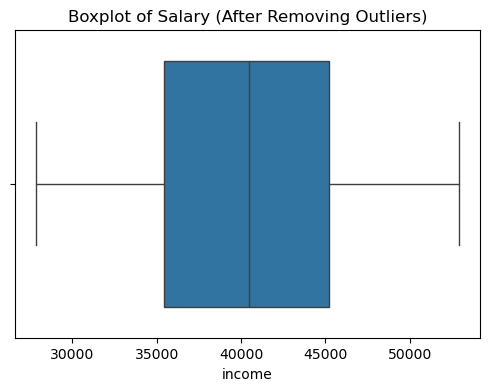

In [14]:
plt.figure(figsize=(6,4))                                                       # Create a figure with a specified size (6 inches by 4 inches)
sns.boxplot(x=df_salary['income'])                                              # Generate a boxplot for the 'income' column in df_salary
plt.title("Boxplot of Salary (After Removing Outliers)")                        # Set the title of the plot
plt.show()                                                                      # Display the boxplot after removing outliers

# Separating Features and Target (Independent and Dependent Variables)

In [16]:
x=df_salary['experience']                                                       # Assign 'Years of Experience' column to x.
y=df_salary['income']                                                           # Assign 'Salary' column to y.

#  Splitting Data into Training and Testing Sets

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=6) # Split data into training and testing sets.

# Reshaping x_train and x_test into 2D array

In [20]:
x_train=np.array(x_train).reshape(-1,1)                                         # Reshape x_train into a 2D array for compatibility with Scikit-Learn.
x_test=np.array(x_test).reshape(-1,1)                                           # Reshape x_test into a 2D array for compatibility with Scikit-Learn.

# Building the Linear Regression Model

In [22]:
lr=LinearRegression()                                                           # Create a LinearRegression object.
lr.fit(x_train,y_train)                                                         # Fit the linear regression model using training data.

LinearRegression()

# Extracting Model Coefficients:

In [24]:
print("Intercept (W0):", lr.intercept_)                                         # Print the intercept of the model
print("Coefficient (W1):", lr.coef_)                                            # Print the coefficient(s) of the model

Intercept (W0): 27498.24801086745
Coefficient (W1): [1885.74927227]


# Estimating Salaries for Training Data

In [26]:
y_pred_train = lr.predict(x_train)                                              # Predict salaries using the trained model on training data.
y_pred_train = y_pred_train.round().astype(int)                                 # Round the predictions to nearest integer and convert to int.
y_pred_train                                                                    # Display the predicted salaries.

array([42584, 33155, 40698, 44470, 46356, 35041, 36927, 36927, 35041,
       48241, 46356, 35041, 38813, 50127, 42584, 44470, 40698, 38813,
       31270, 46356, 36927, 44470, 33155, 36927, 42584, 42584, 50127,
       36927, 48241, 31270, 36927, 50127, 46356, 35041, 33155, 50127,
       44470, 44470, 31270, 42584, 44470, 50127, 46356, 46356, 31270,
       33155, 44470, 38813, 42584, 40698, 50127, 38813, 46356, 31270,
       36927, 33155, 36927, 52013, 36927, 46356, 33155, 38813, 33155,
       38813, 50127, 36927, 38813, 48241, 36927, 38813, 29384])

# Calculating MAE (Training)

In [28]:
mae_train = mean_absolute_error(y_train, y_pred_train)                          # Calculate and display the mean absolute error on training data.
print("MAE (Training):", mae_train)

MAE (Training): 1643.7042253521126


# Calculating R-Squared (Training)

In [30]:
r2_score(y_pred_train, y_train)                                                 # Calculate and display the R-squared score on training data.

0.8889564206251441

# Estimating salaries for Testing Data

In [32]:
y_pred_test = lr.predict(x_test)                                                # Predict salaries using the trained model on testing data.
y_pred_test = y_pred_test.round().astype(int)                                   # Round the predictions to nearest integer and convert to int.
y_pred_test                                                                     # Display the predicted salaries.

array([29384, 35041, 38813, 36927, 40698, 33155, 35041, 31270, 38813,
       38813, 48241, 44470, 33155, 35041, 36927, 38813, 50127, 48241,
       38813, 33155, 38813, 31270, 42584, 46356, 35041, 50127, 36927,
       40698, 29384, 36927, 42584])

# Visualizing Model Performance (Testing)

Text(0.5, 1.0, 'Linear Regression (Testing)')

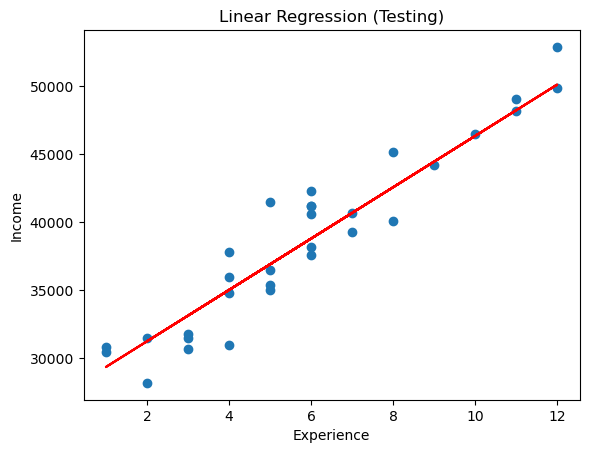

In [33]:
plt.scatter(x_test,y_test)                                                      # Plot a scatter plot of 'Years of Experience' vs 'Salary' (testing data).
plt.plot(x_test, y_pred_test, color='red')                                      # Plot the regression line on the scatter plot.
plt.xlabel("Experience")                                                        # Set the x-axis label.
plt.ylabel("Income")                                                            # Set the y-axis label.
plt.title("Linear Regression (Testing)")                                        # Set the title of the plot.

# Calculating MAE (Testing)

In [35]:
 mean_absolute_error(y_test,y_pred_test)                                        # Calculate and display the mean absolute error on testing data.

1626.4193548387098

# Calculating R-Squared (Testing)

In [37]:
r2_score(y_pred_test, y_test)                                                   # Calculate and display the R-squared score on testing data.

0.8745365325054568

# **Multiple Linear Regression**

# Loading the Dataset

In [48]:
df_salaries = pd.read_csv(r"salaries_mlr.csv")       # Load dataset from CSV file

# Dataset Information

In [51]:
df_salaries.tail()                                                              # Displays the last few rows

,age,experience,gender,income
101,46,10,f,47100
102,55,6,m,38200
103,53,5,f,35600
104,48,12,m,52900
105,41,8,f,40400


In [53]:
df_salaries.dtypes                                                              # Shows the data type of each column.

age            int64
experience     int64
gender        object
income         int64
dtype: object

In [55]:
df_salaries.isnull().sum()                                                      # Check for missing values

age           0
experience    0
gender        0
income        0
dtype: int64

# Categorical Encoding

In [58]:
df_salaries['gender'] = df_salaries['gender'].map({'m': 1, 'f': 0})             # Replace 'm' with 1 and 'f' with 0 in the 'gender' column

# Defining Features and Target Variable

In [61]:
X = df_salaries.drop(columns='income')                                          # Define feature variables by dropping the target column
y = df_salaries['income']                                                       # Define target variable

# Spliting Dataset into Training and Testing Sets

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split dataset into 70% training and 30% testing sets

# Training the Linear Regression Model

In [67]:
model = LinearRegression()                                                      # Initialize the linear regression model
model.fit(X_train, y_train)                                                     # Train the model on the training data

LinearRegression()

# Extracting Model Coefficients and Intercept

In [70]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}) # Create a DataFrame to display model coefficients
intercept = model.intercept_                                                    # Get the model intercept
print("Model Coefficients:")                                                    # Print the model coefficients
print(coefficients)                                                             # Print the coefficients DataFrame
print(" ")                                                                      # Print a blank line for better readability
print(f"Intercept: {intercept}")                                                # Print the model intercept

Model Coefficients:
      Feature  Coefficient
0         age   -56.708657
1  experience  2026.917102
2      gender    60.437993
 
Intercept: 28988.837722483844


# Predicting Salaries for Training Data

In [73]:
y_train_pred = model.predict(X_train)                                           # Make predictions on the training data
y_train_pred = y_train_pred.round().astype(int)                                 # Round the predictions to nearest integer and convert to int.
y_train_pred                                                                    # Display the training data predictions

array([43053, 43276, 43999, 39169, 33599, 40285, 50650, 39566, 49243,
       40909, 60157, 39510, 52847, 35286, 41192, 64215, 35569, 37195,
       47160, 42879, 35626, 42369, 51327, 44849, 34204, 48964, 37369,
       29772, 46880, 37025, 39169, 37596, 48850, 36118, 50764, 48850,
       33712, 46649, 37596, 32295, 44679, 42879, 36118, 35282, 39226,
       41026, 37422, 37365, 44055, 38205, 46990, 47103, 36231, 51157,
       31682, 45076, 50877, 33368, 34548, 35339, 30377, 39279, 33709,
       39566, 50934, 64158, 38092, 31629, 33542, 37365, 50817, 32238,
       31398, 38092])

# Calculating Training Data MAE

In [76]:
mae_train = mean_absolute_error(y_train, y_train_pred)                          # Calculate Mean Absolute Error for training data
print(f'Training data MAE: {mae_train}')                                        # Print the MAE for training data

Training data MAE: 1564.1756756756756


# Calculating Training Data Adjusted R-Squared

---



In [79]:
r2_train = r2_score(y_train, y_train_pred)                                      # Calculate R-Squared for training data
n_train = len(y_train)                                                          # Number of training samples
k_train = X_train.shape[1]                                                      # Number of features in training data
adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1)) / (n_train - k_train - 1)   # Calculate adjusted R-Squared
print(f'Training data Adjusted R-Squared: {adj_r2_train}')                      # Print the adjusted R-Squared for training data

Training data Adjusted R-Squared: 0.9341429520527691


# Predicting Salaries for Testing Data

In [82]:
y_test_pred = model.predict(X_test)                                             # Make predictions on the testing data
y_test_pred = y_test_pred.round().astype(int)                                   # Round the predictions to nearest integer and convert to int.
y_test_pred                                                                     # Display the testing data predictions

array([33599, 29371, 46880, 46593, 37365, 42822, 31402, 36175, 43276,
       44626, 34998, 30324, 29658, 39113, 44796, 50707, 31738, 47046,
       40399, 51047, 36122, 33656, 38149, 39566, 32408, 46649, 44112,
       43333, 38886, 37309, 62301, 48793])

# Visualizing Testing Performance

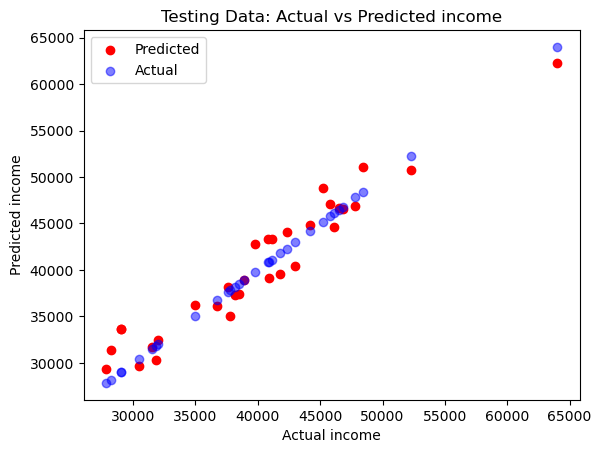

In [85]:
plt.scatter(y_test, y_test_pred, color='red', label='Predicted')                # Plot predicted vs actual for testing data
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')            # Plot actual values for reference
plt.xlabel('Actual income')                                                     # Set x-axis label
plt.ylabel('Predicted income')                                                  # Set y-axis label
plt.title('Testing Data: Actual vs Predicted income')                           # Set plot title
plt.legend()                                                                    # Add legend to the plot
plt.show()                                                                      # Display the plot

# Calculating Testing Data MAE

In [87]:
mae_test = mean_absolute_error(y_test, y_test_pred)                             # Calculate Mean Absolute Error for testing data
print(f'Testing data MAE: {mae_test}')                                          # Print the MAE for testing data

Testing data MAE: 1700.15625


# Calculating Testing Data Adjusted R-Squared

In [91]:
r2_test = r2_score(y_test, y_test_pred)                                         # Calculate R-Squared for testing data
n_test = len(y_test)                                                            # Number of testing samples
k_test = X_test.shape[1]                                                        # Number of features in testing data
adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1)) / (n_test - k_test - 1)        # Calculate adjusted R-Squared
print(f'Testing data Adjusted R-Squared: {adj_r2_test}')                        # Print the adjusted R-Squared for testing data

Testing data Adjusted R-Squared: 0.9212834684709408


# Residual Plot

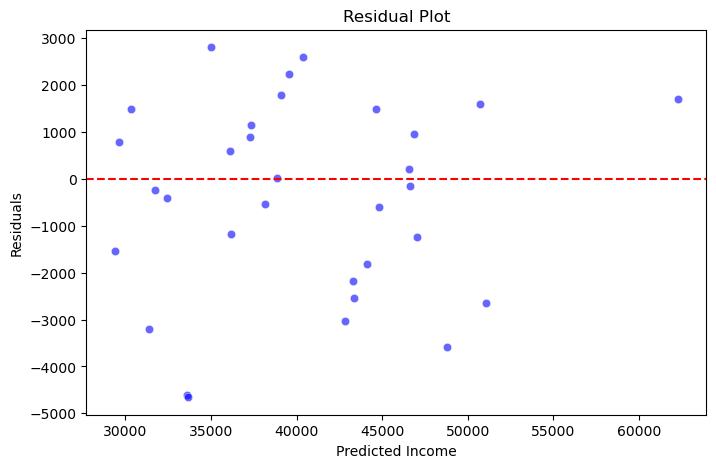

In [93]:
residuals = y_test - y_test_pred                                                # Compute the residuals, which are the differences between actual and predicted values

plt.figure(figsize=(8, 5))                                                      # Create a figure with a specified size (8 inches by 5 inches)
sns.scatterplot(x=y_test_pred, y=residuals, color='blue', alpha=0.6)            # Create a scatter plot of predicted vs residuals
plt.axhline(y=0, color='red', linestyle='dashed')                               # Add a horizontal red dashed line at y=0 for reference
plt.xlabel("Predicted Income")                                                  # Label the x-axis as "Predicted Income"
plt.ylabel("Residuals")                                                         # Label the y-axis as "Residuals"
plt.title("Residual Plot")                                                      # Set the title of the plot as "Residual Plot"
plt.show()                                                                      # Display the plot